# Homework 0: Python

Welcome to the course! Throughout the semester, each student will learn deep learning algorithms that are widely employed in data science and the scientific community generally. The best way to understand these concepts is to implement them.

This class cannot teach basic coding skills, therefore a strong python background is required.  This assignment is intended as a personal way to test each student's coding skills and the grade will be binary (`0` or `1`) to avoid an impact on final grades. A grade of 1 means that the student's coding skills are sufficient to be successful in this course, while a 0 means that the student is likely not prepared to take this course.

**BECAUSE OF THIS, WE URGE YOU TO COMPLETE THIS ASSIGNMENT ON YOUR OWN, WITHOUT DISCUSSING IT WITH CLASSMATES OR OTHER PEOPLE. OF COURSE, YOU CAN REFER TO EACH MODULE'S DOCUMENTATION AVAILABLE ON THE INTERNET.**

## Part 1 - Load the necessary modules

1.   The module `numpy` (you should be able to refer to numpy as `np` from now on)
1.   The submodule `pyplot` from the module `matplotlib` (you should be able to refer to this as `plt` from now on)
1.   The module `imageio`
1.   The module `os`
1.   The class `LinearRegression` from `sklearn.linear_model`
1.   The subvolume `drive` from the module `google.colab`
1.   Use the function `drive.mount('/content/gdrive')` to mount your Google drive into this notebook.

In [1]:
# code for part 1 goes here
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from sklearn.linear_model import  LinearRegression
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Part 2 - Simple image I/O and manipulation with `numpy`

1.   Outside of this noteobook, import an image (png, jpg... any format is fine) in the root of your Google drive.
1.   In this notebook, use the module `imageio` to open your image and read it in as a numpy array.  To find the path to your Google drive root you need to use `os.getcwd() + "/gdrive/My Drive"`.
1.   Print the shape of the image.  The image will have one of the following shapes: 
        *   `[height, width, 3]`. The image has 3 channels Red-Green-Blue (RGB). Use the formula R x 0.2989 + G x 0.5870 + B x 0.1140 to transform it to a gray scale image.
        *   `[height, width, 4]`. In this case, the fourth channel is the opacity, which you don't need. Get rid of the fourth channel and follow the formula above to turn the image into a gray scale image.
        * `[height, width]`. The image is already gray scale, leave it as is.
1.   Show this numpy array as an image using `matplotlib.pyplot.imshow`.
1.   Using functions from `numpy.random`, add random gaussian noise with mean 0 and standard deviation 13 to the image and display the new, noisy image.



(827, 1200, 3)
(827, 1200)


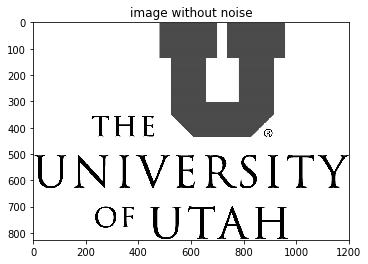

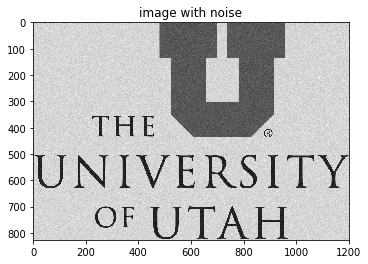

In [3]:
# code for part 2 goes here
im = imageio.imread(os.getcwd() + "/gdrive/My Drive/utah.jpg")
print(im.shape)
grey_im=im[:,:,0]*0.2989+im[:,:,1]*0.5870 +im[:,:,2]*0.1140
print(grey_im.shape)
plt.figure()
plt.imshow(grey_im, cmap='gray')
plt.title("image without noise")
plt.show()
grey_im_noise=grey_im+np.random.normal(0,13,grey_im.shape)
plt.figure()
plt.imshow(grey_im_noise, cmap='gray')
plt.title("image with noise")
plt.show()


## Part 3 - 2D point visualization

1.   Create an array of shape `[400, 2]` where each entry is randomly chosen from a uniform distribution in the closed range `[-10, 10]`. You will obtain a dataset of 400 points in the 2D Euclidean plane. As an example of the structure of this array, let's name this array `X`:
  *   `X[9, :]` is the tenth point in dataset (remember that in CS you start counting from 0)
  *   `X[9, 0]` is the tenth point's x dimension
  *   `X[9, 1]` is the tenth point's y dimension
1.   Plot these 400 points in the 2D plane.
1.   Define a function that takes this array and returns a label indicating the quadrant each point in the array falls in:
  *   x < 0, y > 0 $\rightarrow$ label = 0
  *   x > 0, y > 0 $\rightarrow$ label = 1
  *   x < 0, y < 0 $\rightarrow$ label = 2
  *   x > 0, y < 0 $\rightarrow$ label = 3
1. Plot the 400 points again, but this time color each point according to its label: 0=blue, 1=green, 2=red, 3=black.

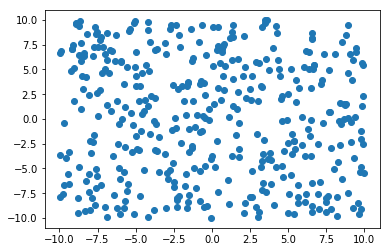

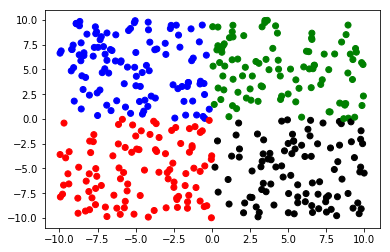

In [4]:
# code for part 3 goes here
X=np.random.uniform(-10,10,(400,2))
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()
def label_func(x):
  label=np.zeros(x.shape[0])
  label_0=np.argwhere((x[:,0]<0) *(x[:,1]>0)) 
  label_1=np.argwhere((x[:,0]>0) *(x[:,1]>0)) 
  label_2=np.argwhere((x[:,0]<0) *(x[:,1]<0)) 
  label_3=np.argwhere((x[:,0]>0) *(x[:,1]<0)) 
  label[label_0]=0
  label[label_1]=1
  label[label_2]=2
  label[label_3]=3
  return label
def pltcolor(lst):
    cols=[]
    for l in lst:
       
        l=int(l)

        if l==0:
            
            cols.append('blue')
        elif l==1:
            cols.append('green')
            
        elif l==2:
            cols.append('red')
        else:
            cols.append('black')
            
    return cols
label=label_func(X)
colormap=pltcolor(label)

plt.figure()
plt.scatter(X[:,0],X[:,1],c=colormap)
plt.show()
  

## Part 4 - Linear regression with `scikit-learn`

1.   Using `numpy`, create the dataset: your `x` coordinates should be an array of ordered integers from 0 to 10, and your `y` coordinates should be the square of your `x` coordinates.
1.   Fit a linear regression model to this dataset using the class `LinearRegression`.
1.   Plot both the dataset and the resulting line you fit to this dataset.


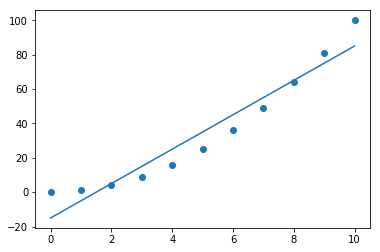

In [13]:
# code for part 4 goes here
x=np.arange(0,11,1)[:,np.newaxis]
y=x*x
linear_fit=LinearRegression()
linear_fit.fit(x,y)
y_fit=linear_fit.predict(x)
plt.figure()
plt.scatter(x,y)
plt.plot(x,y_fit)
plt.show()


## Congrats, you are done!

Throughout the semester, the three TMs will help you figure out the concepts and also help with some coding problems, but you are in charge of your work and you are responsible for starting the class with the proper background.

